In [24]:
import pandas_datareader.data as reader
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
end = dt.datetime.now()
start = dt.date(end.year, end.month - 3, end.day)
stocks = ['MSFT', 'AAPL', 'GE', '^GSPC']

In [14]:
df = yf.download(stocks, start=start, end=end)

[*********************100%%**********************]  4 of 4 completed


In [15]:
df = df['Adj Close']

In [16]:
df.head()

Ticker,AAPL,GE,MSFT,^GSPC
Date,,,,
2024-02-26,180.914627,123.300217,406.806244,5069.529785
2024-02-27,182.382629,122.678818,406.746338,5078.180176
2024-02-28,181.174255,123.969414,406.985901,5069.759766
2024-02-29,180.505173,124.989151,412.895264,5096.270020
2024-03-01,179.416656,126.391281,414.751892,5137.080078


In [17]:
weekly_returns = df.resample('W').ffill().pct_change()

In [18]:
weekly_returns.head()

Ticker,AAPL,GE,MSFT,^GSPC
Date,,,,
2024-03-03,NaN,NaN,NaN,NaN
2024-03-10,-0.049705,0.058683,-0.022334,-0.002607
2024-03-17,0.011070,0.005537,0.025110,-0.001288
2024-03-24,-0.001970,0.037066,0.029585,0.022882
2024-03-31,-0.004644,0.002169,-0.018706,0.003854


In [19]:
weekly_returns = weekly_returns.dropna()
weekly_returns.head()

Ticker,AAPL,GE,MSFT,^GSPC
Date,,,,
2024-03-10,-0.049705,0.058683,-0.022334,-0.002607
2024-03-17,0.011070,0.005537,0.025110,-0.001288
2024-03-24,-0.001970,0.037066,0.029585,0.022882
2024-03-31,-0.004644,0.002169,-0.018706,0.003854
2024-04-07,-0.011080,0.115729,0.011409,-0.009518


In [20]:
weekly_returns.cov()

Ticker,AAPL,GE,MSFT,^GSPC
Ticker,,,,
AAPL,0.001576,-0.000071,0.000487,0.000277
GE,-0.000071,0.002265,0.000457,0.000222
MSFT,0.000487,0.000457,0.000622,0.000298
^GSPC,0.000277,0.000222,0.000298,0.000276


In [21]:
weekly_returns.var()

Ticker
AAPL     0.001576
GE       0.002265
MSFT     0.000622
^GSPC    0.000276
dtype: float64

In [22]:
weekly_returns.corr()

Ticker,AAPL,GE,MSFT,^GSPC
Ticker,,,,
AAPL,1.000000,-0.037761,0.491787,0.419568
GE,-0.037761,1.000000,0.385273,0.280179
MSFT,0.491787,0.385273,1.000000,0.719292
^GSPC,0.419568,0.280179,0.719292,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

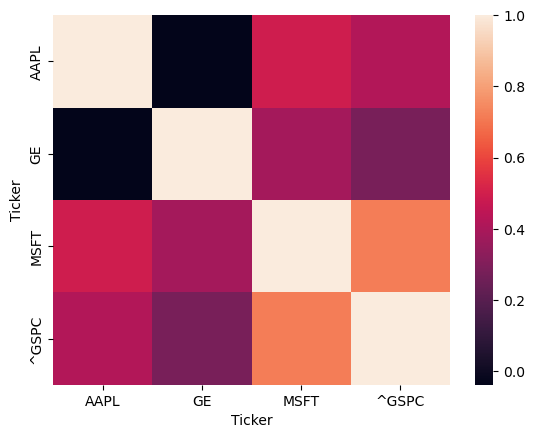

In [25]:
sns.heatmap(weekly_returns.corr())